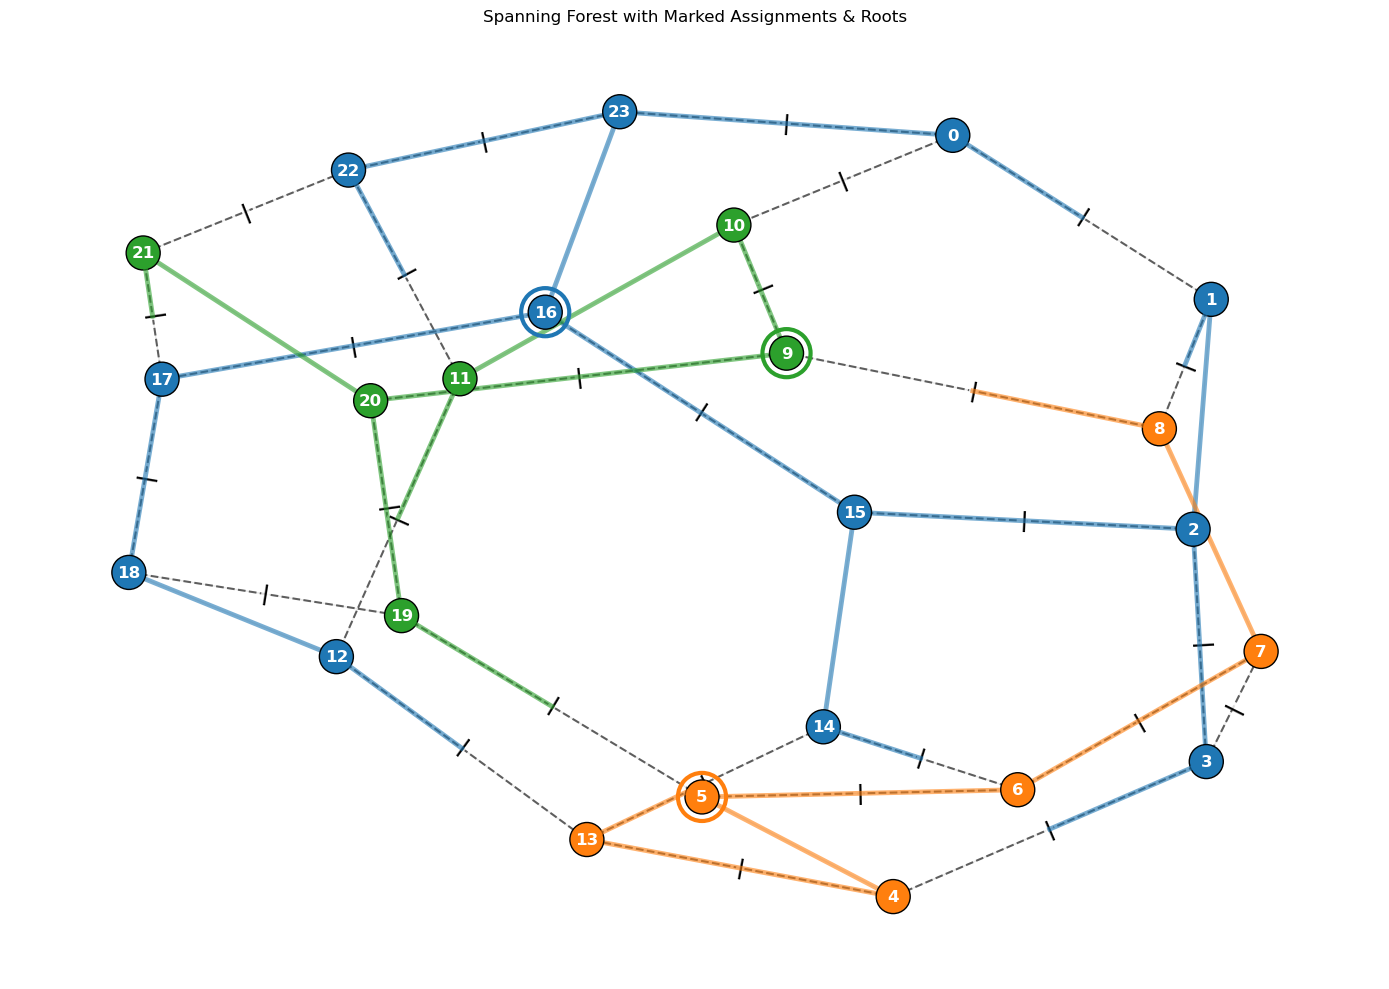

In [1]:
import stim

from spidercat.draw import draw_spanning_forest_solution
from spidercat.spanning_tree import find_min_height_roots
from spidercat.utils import load_solution_triplet, ed

grf, forest, M, matchings = load_solution_triplet(28, 4, 3)
roots = find_min_height_roots(forest)

draw_spanning_forest_solution(grf, forest, M, matchings, roots)

M: {(0, 23): 1, (0, 1): 1, (0, 10): 1, (1, 8): 1, (2, 3): 1, (2, 15): 1, (3, 4): 1, (3, 7): 1, (4, 13): 1, (5, 6): 1, (5, 19): 1, (6, 7): 1, (6, 14): 1, (8, 9): 1, (9, 10): 1, (9, 20): 1, (11, 12): 1, (11, 22): 1, (12, 13): 1, (13, 14): 1, (15, 16): 1, (16, 17): 1, (17, 18): 1, (17, 21): 1, (18, 19): 1, (19, 20): 1, (21, 22): 1, (22, 23): 1, (1, 2): 0, (4, 5): 0, (7, 8): 0, (10, 11): 0, (12, 18): 0, (14, 15): 0, (16, 23): 0, (20, 21): 0}
matchings: {0: [(0, 1)], 1: [(1, 8)], 3: [(3, 4)], 8: [(8, 9)], 11: [(11, 12)], 12: [(12, 13)], 13: [(13, 14)], 14: [(6, 14)], 19: [(5, 19)], 21: [(17, 21)], 22: [(11, 22)]}
=== Starting Clean Extraction ===
  Estimated Data Qubits: 28
  Flags start at: 28
Init Root 16 (Tree 0) -> Q0
  Node 16 -> Branch 17 (New Q1)
    Internal Mark (16, 17): Added Q2
    Link (17, 21) (1st visit): Created Flag 28, CNOT 1->28
  Node 17 -> Primary 18 (Inherits Q1)
    Internal Mark (17, 18): Added Q3
    Link (18, 19) (1st visit): Created Flag 29, CNOT 1->29
  Node 18 -

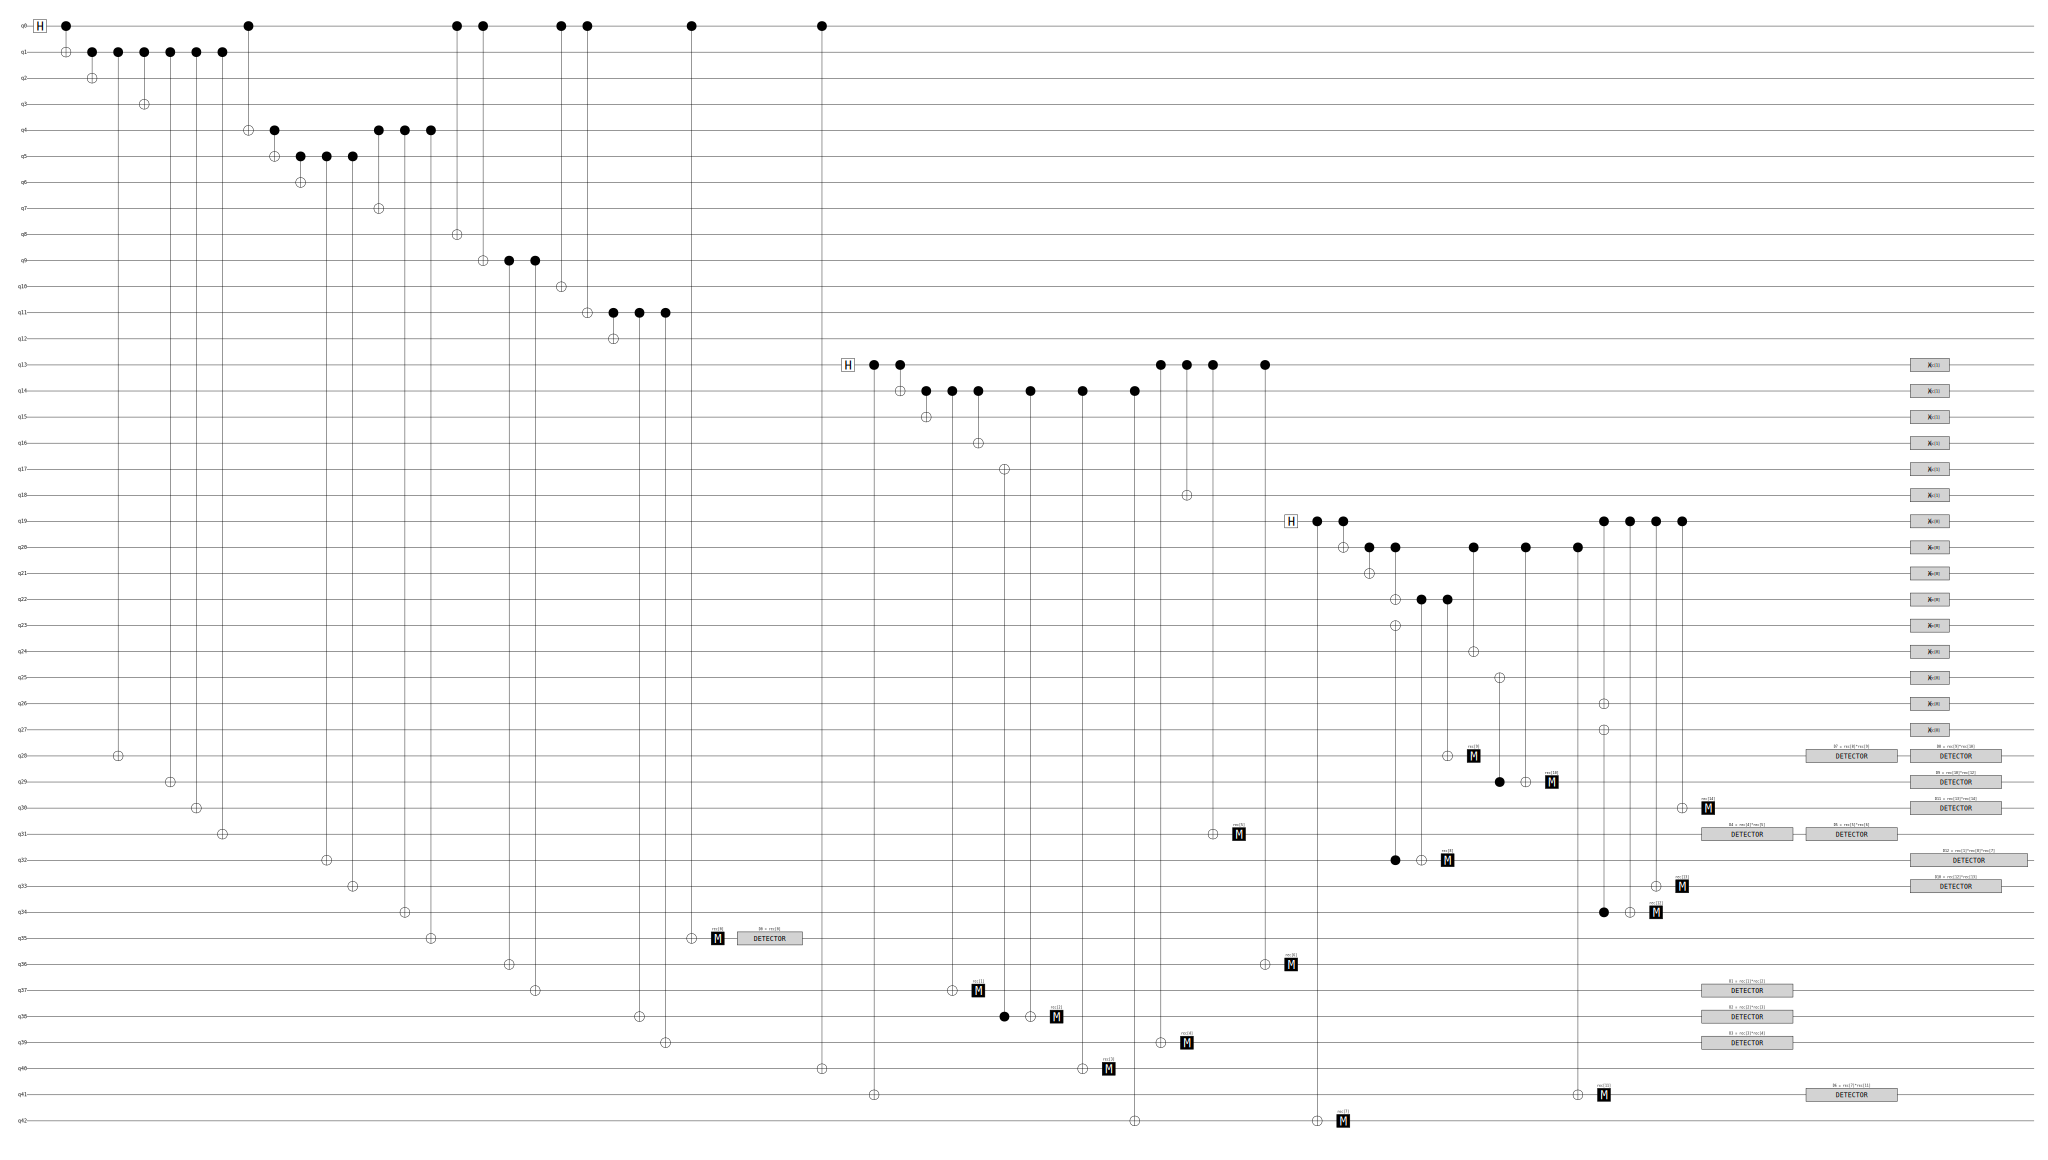

In [2]:
from spidercat.circuit_extraction import extract_circuit_rooted

M = {ed(*k): v for k, v in M.items()}
print("M:", M)
print("matchings:", matchings)
circ = extract_circuit_rooted(grf, forest, roots, M, matchings, verbose=True)
print(circ)
circ.diagram('timeline-svg')

In [3]:
from spidercat.circuit_extraction import make_stim_circ_noisy

# noisy_circ = make_stim_circ_noisy(circ, p_init=0.01, p_meas=0.01)

circ.append("M", range(sum(M.values())))
sampler = circ.compile_sampler()
samples = sampler.sample(100)
print(samples[:5])
converter = circ.compile_m2d_converter()
detectors = converter.convert(measurements=samples, append_observables=False)
error_detected = np.any(detectors, axis=1)
print(detectors[:5])
print(error_detected[:5])

[[ True  True  True  True False False False False False False]
 [False False False False  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True  True]]
[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]]
[False False False False False]


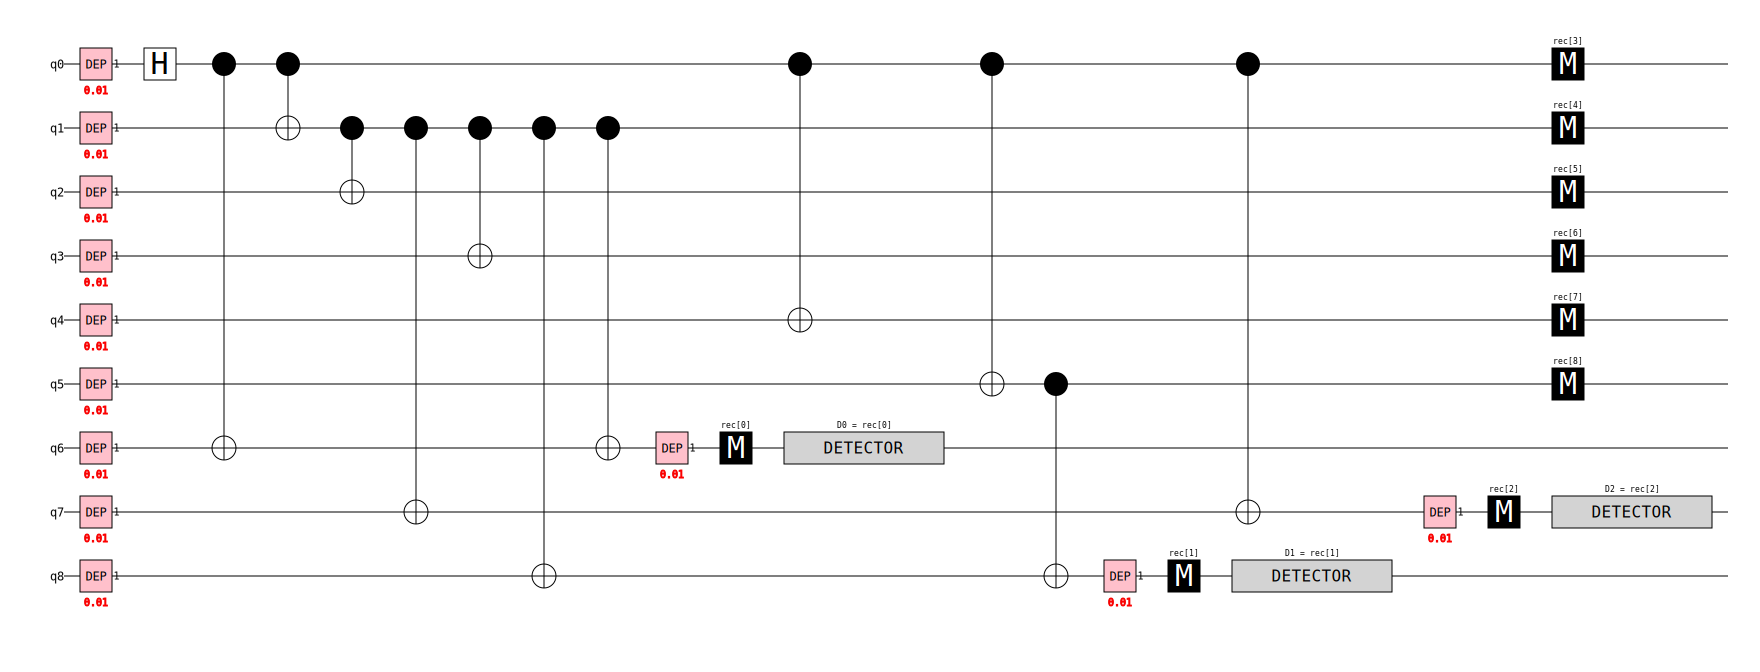

In [4]:
noisy_circ.diagram('timeline-svg')

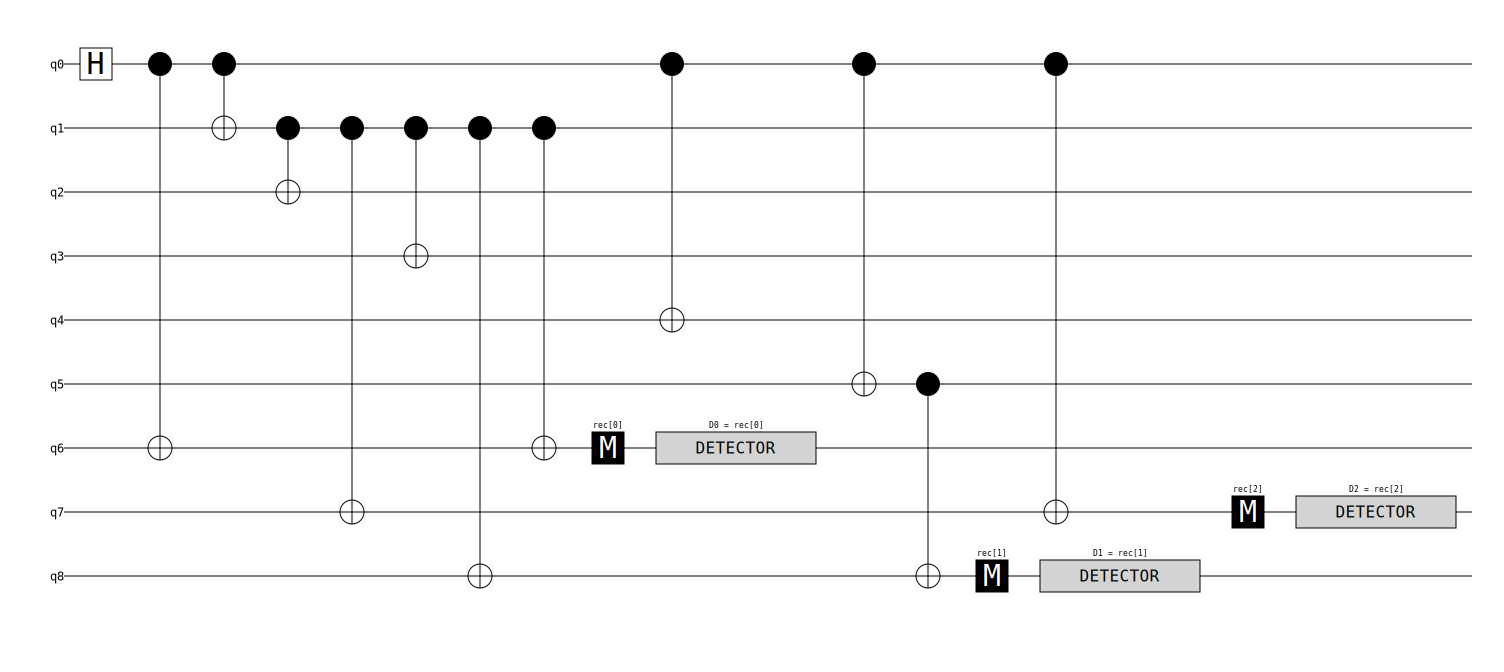

In [5]:
circ.diagram('timeline-svg')

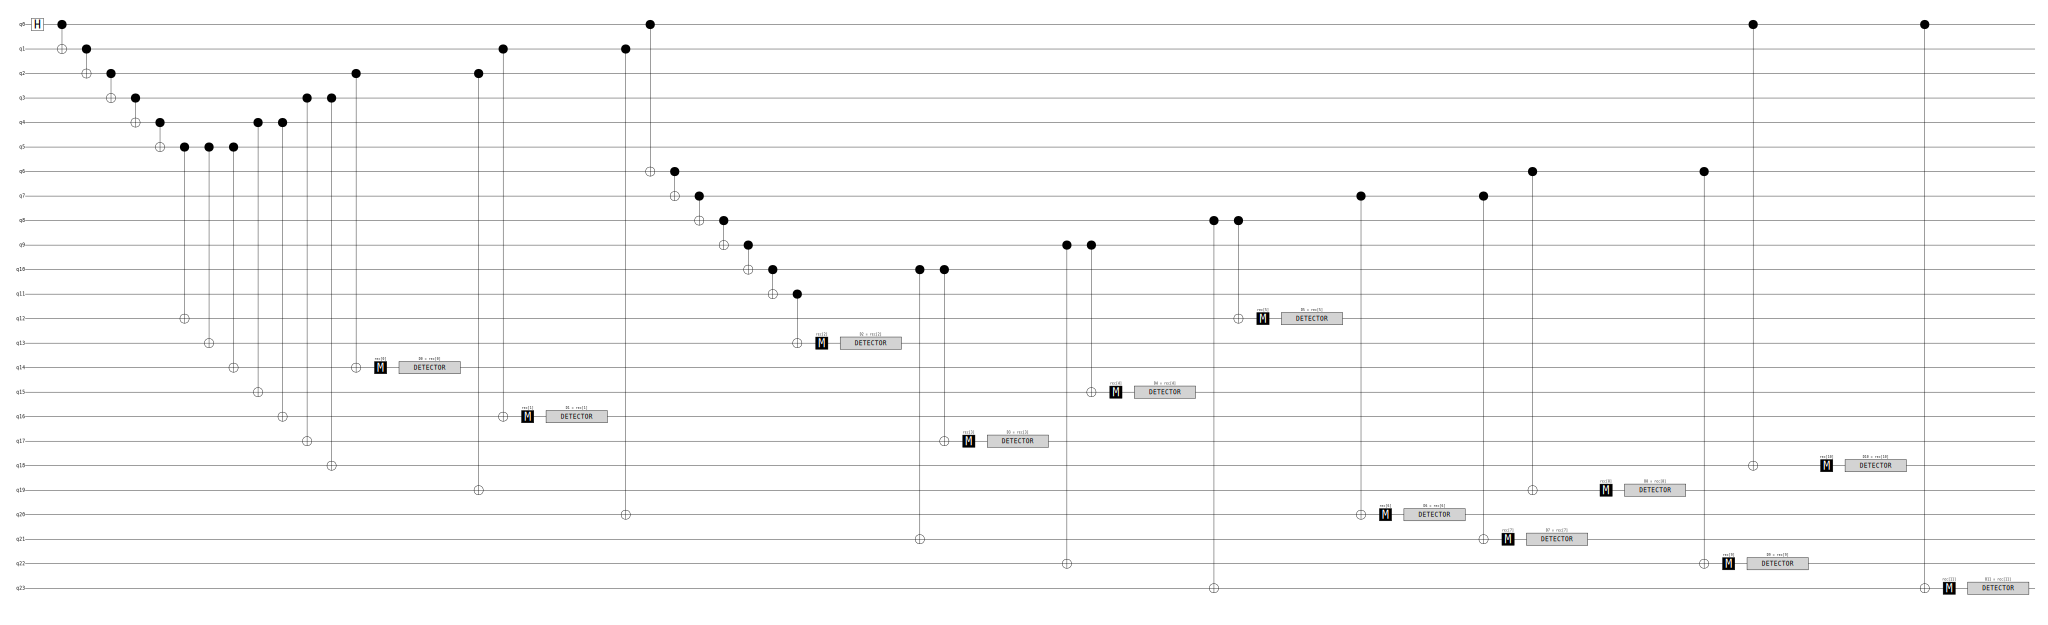

In [1]:
import stim

circ = stim.Circuit("""
H 0
CX 0 1 1 2 2 3 3 4 4 5 5 12 5 13 5 14 4 15 4 16 3 17 3 18 2 14
M 14
DETECTOR rec[-1]
CX 2 19 1 16
M 16
DETECTOR rec[-1]
CX 1 20 0 6 6 7 7 8 8 9 9 10 10 11 11 13
M 13
DETECTOR rec[-1]
CX 10 21 10 17
M 17
DETECTOR rec[-1]
CX 9 22 9 15
M 15
DETECTOR rec[-1]
CX 8 23 8 12
M 12
DETECTOR rec[-1]
CX 7 20
M 20
DETECTOR rec[-1]
CX 7 21
M 21
DETECTOR rec[-1]
CX 6 19
M 19
DETECTOR rec[-1]
CX 6 22
M 22
DETECTOR rec[-1]
CX 0 18
M 18
DETECTOR rec[-1]
CX 0 23
M 23
DETECTOR rec[-1]
""")
circ.diagram('timeline-svg')

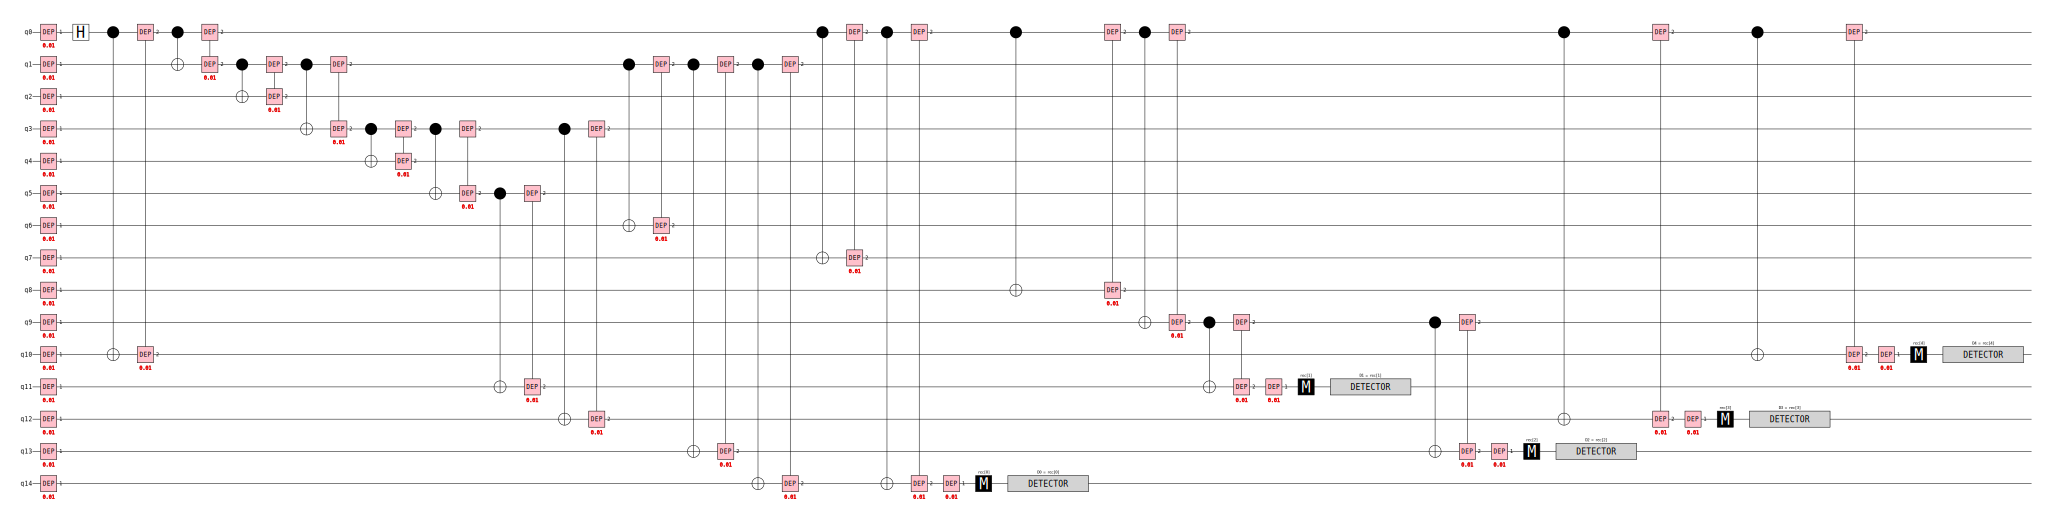

In [9]:
noisy_circ = make_stim_circ_noisy(circ, p_init=0.01, p_meas=0.01, p_2=0.01)
noisy_circ.diagram('timeline-svg')